In [1]:
# Import Pandas module
import pandas as pd

# Import NumPy module
import numpy as np

# We will cover data visualization in more details later in the semester.
# For now the only visualization that we'll explore is histograms.
# Histograms are helpful for visually examining distribution of a particular variable

# The following line is a directive that tells matplotlib module to display
# generated graphs inline with the output of your code
%matplotlib inline 

# Import matplotlib module.  Matplotlib module allows us to generate graphs from data
import matplotlib.pyplot as plt


In [2]:
# Import data file into a Pandas dataframe
df = pd.read_csv("diabetes.csv")

# Display the first 5 rows of the data
df.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip
0,1000,203.0,82.0,56.0,3.6,4.31,Buckingham,_46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0
1,1001,165.0,97.0,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0
2,1002,228.0,92.0,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0
3,1003,78.0,93.0,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0
4,1005,249.0,90.0,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0


In [3]:
# Before cleaning your data or trying to figure out how to analize it, it is always a 
# good idea to understand what your data actually looks like
# describe() function of DataFrame allows us to view basic statistics about our data
df.describe()

,id,chol,stab.glu,hdl,ratio,glyhb,height,weight,bp.1s,bp.1d,waist,hip
count,403.000000,400.000000,401.000000,402.000000,402.000000,390.000000,398.000000,402.000000,398.000000,398.000000,401.000000,401.000000
mean,15978.310174,207.895000,106.690773,50.445274,4.521642,5.589769,66.020101,177.592040,136.904523,83.321608,37.900249,43.039900
std,11881.122124,44.535069,53.206852,17.262626,1.727886,2.242595,3.918515,40.340666,22.741033,13.589227,5.729313,5.656713
min,1000.000000,78.000000,48.000000,12.000000,1.500000,2.680000,52.000000,99.000000,90.000000,48.000000,26.000000,30.000000
25%,4792.500000,179.000000,81.000000,38.000000,3.200000,4.380000,63.000000,151.000000,121.250000,75.000000,33.000000,39.000000
50%,15766.000000,204.000000,89.000000,46.000000,4.200000,4.840000,66.000000,172.500000,136.000000,82.000000,37.000000,42.000000
75%,20336.000000,230.250000,106.000000,59.000000,5.400000,5.600000,69.000000,200.000000,146.750000,90.000000,41.000000,46.000000
max,41756.000000,443.000000,385.000000,120.000000,19.299999,16.110001,76.000000,325.000000,250.000000,124.000000,56.000000,64.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b035908>,
      dtype=object)

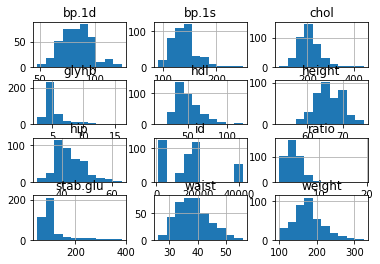

In [4]:
# Now let's generate histograms for all continuous variables to 
# make sure that there are no issues with distributions and/or outliers.
df.hist()


In [7]:
df["chol"].var()


1983.3724060150375

In [9]:
df["chol"].std()

44.53506939497274

In [12]:
df["chol"].mean()

207.895

In [13]:
df["chol"].median()

204.0

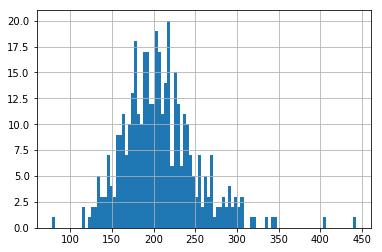

In [5]:
df["chol"].hist(bins=100)

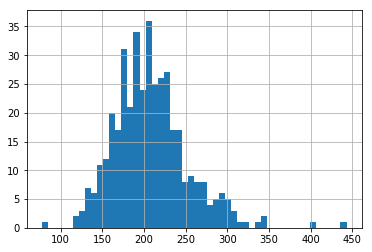

In [6]:
# Looking at histograms of all variables at the same time is a bit difficult, 
# so let's generate a histogram for the variable that we are actually
# interested in examining
df["chol"].hist(bins=50)

In [8]:
df["chol"].mean()

207.895

In [9]:
df["chol"].median()

204.0

In [10]:
df["chol"].mode()

0    179.0
dtype: float64

In [14]:
# Now let's check which values in the dataset are missing
# Note that Pandas treats missing, empty, and null as pretty much the same thing
# isnull() function will render the entire DataFrame with False value in those
# records where the data IS NOT missing, and True where the value IS missing
df.isnull().head()


,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
qry = "hdl == True"
df.isnull().query(qry)
df.loc[[27]]

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip
27,1281,NaN,74.0,NaN,NaN,4.28,Buckingham,48,male,68.0,100.0,small,120.0,85.0,27.0,33.0


In [14]:
# As you can see, running isnull() on the entire dataframe produces
# too much data and it difficult to examine visually.  To summarize
# which columns have missing data, we can comibine isnull() with sum()

df.isnull().sum()

id           0
chol         3
stab.glu     2
hdl          1
ratio        1
glyhb       13
location     0
age          0
gender       3
height       5
weight       1
frame       12
bp.1s        5
bp.1d        5
waist        2
hip          2
dtype: int64

In [17]:
# Alternatively, you can run isnull().sum() on a specific column:

#df["chol"].isnull().sum()
df[["chol","height","weight"]].isnull().sum()

chol      3
height    5
weight    1
dtype: int64

In [19]:
# Now let's deal with missing values

# Solution 1: Remove rows with empty values
# If there are only a few null values and you know that deleting values will 
# not cause adverse effects on your result, remove them from your DataFrame and 
# store that in a new DataFrame* mod_df = df.dropna()

print("Missing values before dropping rows: ")
#print(df.isnull().sum())
print(df.shape)


mod_df = df.dropna()
print("Missing values after dropping rows: ")
#print(mod_df.isnull().sum())
print(mod_df.shape)


Missing values before dropping rows: 
(403, 16)
Missing values after dropping rows: 
(361, 16)


In [21]:
# Solution 2: Fill missing values with a mean (average) value of a given column

# Find the mean
df["chol"].mean()

207.895

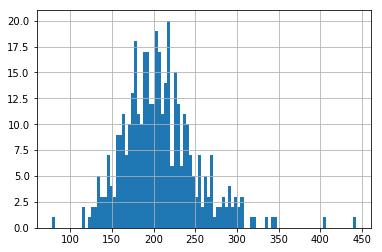

In [20]:
df["chol"].hist(bins=100)

In [21]:
df["chol"].isnull().sum()

3

In [22]:
# Fill missing values with a mean (average) value of a given column
# Note the inplace=True parameter - that means that we are overwriting the data
# in the existing dataset
df["chol"].fillna(df["chol"].mean(), inplace=True)

In [23]:
df["chol"].isnull().sum()

0

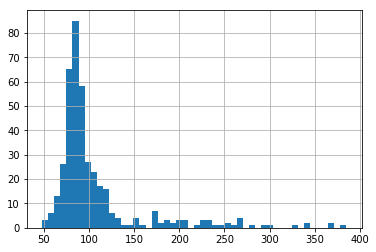

In [24]:
df["stab.glu"].hist(bins=50)

In [25]:
df["stab.glu"].isnull().sum()

2

In [26]:
# Replacing missing data using the median (skewed data)
df["stab.glu"].fillna(df["stab.glu"].median(), inplace=True)

In [27]:
df["stab.glu"].isnull().sum()

0

In [28]:
# Now let's figure out how to deal with discrete values
# Gender is a non-numeric (discrete) column, so we cannot use
# mean, median, or mode to replace the missing value
# A (somewhat) acceptable solution is to replace missing values with 
# the most frequently occurring value

# Let's find out the number of missing values in the "gender" column
df["gender"].isnull().sum()


3

In [29]:
df["gender"].value_counts()

female    233
male      167
Name: gender, dtype: int64

In [30]:
# You can use Pandas' groupby() function to group by and aggregate your DataFrame
# by a particular column or a set of columns

# Let's group by gender and aggregate by mean and count
df.groupby(["gender"]).agg(["mean", "count"])

id              chol          stab.glu              hdl  \
                mean count        mean count        mean count       mean   
gender                                                                      
female  15843.974249   233  208.505536   233  102.587983   233  52.141631   
male    16411.898204   167  207.298772   167  112.568862   167  48.012048   

                 ratio        ...       weight             bp.1s        \
       count      mean count  ...         mean count        mean count   
gender                        ...                                        
female   233  4.354506   233  ...   174.433476   233  136.213043   230   
male     166  4.771084   166  ...   182.307229   166  137.690909   165   

            bp.1d            waist              hip        
             mean count       mean count       mean count  
gender                                                     
female  82.434783   230  38.103448   232  44.336207   232  
male    84.642424   165  37.632530   166  41.259036   166  

[2 rows x 24 columns]

In [31]:
# Now let's group by so we just get a list of genders and a count for each gender
df.groupby(["gender"]).agg({'gender':'count'})

,gender
gender,
female,233
male,167


In [32]:
# Now that we know that "female" occurs more frequently...
df["gender"].fillna("female", inplace=True)

In [39]:
df.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip
0,1000,203.0,82.0,56.0,3.6,4.31,Buckingham,_46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0
1,1001,165.0,97.0,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0
2,1002,228.0,92.0,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0
3,1003,78.0,93.0,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0
4,1005,249.0,90.0,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0


In [33]:
df.describe()

,id,chol,stab.glu,hdl,ratio,glyhb,height,weight,bp.1s,bp.1d,waist,hip
count,403.000000,403.000000,403.000000,402.000000,402.000000,390.000000,398.000000,402.000000,398.000000,398.000000,401.000000,401.000000
mean,15978.310174,207.895000,106.602978,50.445274,4.521642,5.589769,66.020101,177.592040,136.904523,83.321608,37.900249,43.039900
std,11881.122124,44.368583,53.088926,17.262626,1.727886,2.242595,3.918515,40.340666,22.741033,13.589227,5.729313,5.656713
min,1000.000000,78.000000,48.000000,12.000000,1.500000,2.680000,52.000000,99.000000,90.000000,48.000000,26.000000,30.000000
25%,4792.500000,179.000000,81.000000,38.000000,3.200000,4.380000,63.000000,151.000000,121.250000,75.000000,33.000000,39.000000
50%,15766.000000,204.000000,89.000000,46.000000,4.200000,4.840000,66.000000,172.500000,136.000000,82.000000,37.000000,42.000000
75%,20336.000000,230.000000,106.000000,59.000000,5.400000,5.600000,69.000000,200.000000,146.750000,90.000000,41.000000,46.000000
max,41756.000000,443.000000,385.000000,120.000000,19.299999,16.110001,76.000000,325.000000,250.000000,124.000000,56.000000,64.000000


In [41]:
# Let's check to make sure that the data in a given column is all numeric
df.applymap(np.isreal)

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip
0,True,True,True,True,True,True,False,False,False,True,True,False,True,True,True,True
1,True,True,True,True,True,True,False,False,False,True,True,False,True,True,True,True
2,True,True,True,True,True,True,False,False,False,True,True,False,True,True,True,True
3,True,True,True,True,True,True,False,False,False,True,True,False,True,True,True,True
4,True,True,True,True,True,True,False,False,False,True,True,False,True,True,True,True
5,True,True,True,True,True,True,False,False,False,True,True,False,True,True,True,True
6,True,True,True,True,True,True,False,False,False,True,True,False,True,True,True,True
7,True,True,True,True,True,True,False,False,False,True,True,False,True,True,True,True
8,True,True,True,True,True,True,False,False,False,True,True,False,True,True,True,True
9,True,True,True,True,True,True,False,False,False,True,True,False,True,True,True,True


In [46]:
df["age"].head()

0    _46
1     29
2     58
3     67
4     64
Name: age, dtype: object

In [34]:
# Now let's check a specific column:

df["age"].to_frame().applymap(np.isreal)
#pd.DataFrame(df["age"]).applymap(np.isreal)
q = "age == True"
df["age"].to_frame().applymap(np.isreal).query(q)

,age


In [47]:
# Now let's find the specific non-numeric values
for val in df["age"]:
    if not str(val).isdigit():
        print(val)

_46
_45


In [ ]:
df["age"].sum()

In [36]:
# In this case, the number is preceded with an underscore. 
# We can easily fix this by replacing the underscore with an empty string
df["age"] = df["age"].str.strip().str.lower().str.replace('_', '')

# Let's check our work again
for val in df["age"]:
    if not str(val).isdigit():
        print(val)

In [37]:
# We don't seem to have any non-numeric values, but as far as the DataFrame
# is concerned, we are still not dealing with numbers:
df["age"].dtype

dtype('O')

In [38]:
# Let's convert all the values in the column to numbers
#df["age"].apply(pd.to_numeric)
df["age"] = df["age"].astype("int64")
df["age"].dtype

dtype('int64')

In [53]:
df.describe()

,id,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,waist,hip
count,403.000000,400.000000,403.000000,402.000000,402.000000,390.000000,403.000000,398.000000,402.000000,398.000000,398.000000,401.000000,401.000000
mean,15978.310174,207.895000,106.602978,50.445274,4.521642,5.589769,46.851117,66.020101,177.592040,136.904523,83.321608,37.900249,43.039900
std,11881.122124,44.535069,53.088926,17.262626,1.727886,2.242595,16.312333,3.918515,40.340666,22.741033,13.589227,5.729313,5.656713
min,1000.000000,78.000000,48.000000,12.000000,1.500000,2.680000,19.000000,52.000000,99.000000,90.000000,48.000000,26.000000,30.000000
25%,4792.500000,179.000000,81.000000,38.000000,3.200000,4.380000,34.000000,63.000000,151.000000,121.250000,75.000000,33.000000,39.000000
50%,15766.000000,204.000000,89.000000,46.000000,4.200000,4.840000,45.000000,66.000000,172.500000,136.000000,82.000000,37.000000,42.000000
75%,20336.000000,230.250000,106.000000,59.000000,5.400000,5.600000,60.000000,69.000000,200.000000,146.750000,90.000000,41.000000,46.000000
max,41756.000000,443.000000,385.000000,120.000000,19.299999,16.110001,92.000000,76.000000,325.000000,250.000000,124.000000,56.000000,64.000000
